In [1]:
import pandas as pd

In [4]:
# Load the dataset
data = pd.read_csv('Nov 29/bestsellers with categories.csv')

# Display the first few rows to understand the structure of the dataset
data.head()


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
# Display the last 10 rows to understand the structure of the dataset
data.tail(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
540,Wonder,R. J. Palacio,4.8,21625,9,2013,Fiction
541,Wonder,R. J. Palacio,4.8,21625,9,2014,Fiction
542,Wonder,R. J. Palacio,4.8,21625,9,2015,Fiction
543,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [8]:
# Descriptive Statistics
descriptive_stats = data.describe()

# Distribution of books by Genre and Year
genre_distribution = data['Genre'].value_counts()
year_distribution = data['Year'].value_counts().sort_index()

descriptive_stats, genre_distribution, year_distribution


(       User Rating       Reviews       Price         Year
 count   550.000000    550.000000  550.000000   550.000000
 mean      4.618364  11953.281818   13.100000  2014.000000
 std       0.226980  11731.132017   10.842262     3.165156
 min       3.300000     37.000000    0.000000  2009.000000
 25%       4.500000   4058.000000    7.000000  2011.000000
 50%       4.700000   8580.000000   11.000000  2014.000000
 75%       4.800000  17253.250000   16.000000  2017.000000
 max       4.900000  87841.000000  105.000000  2019.000000,
 Genre
 Non Fiction    310
 Fiction        240
 Name: count, dtype: int64,
 Year
 2009    50
 2010    50
 2011    50
 2012    50
 2013    50
 2014    50
 2015    50
 2016    50
 2017    50
 2018    50
 2019    50
 Name: count, dtype: int64)

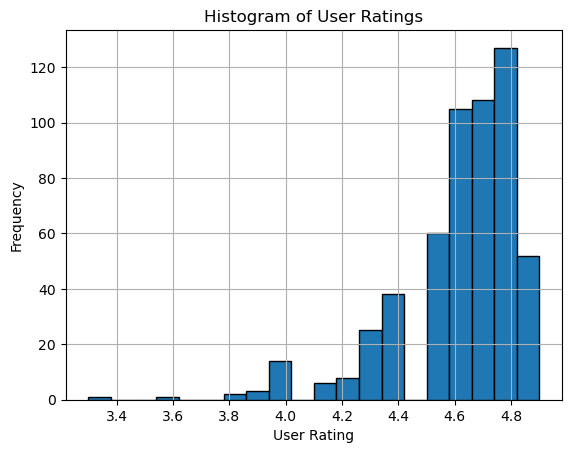

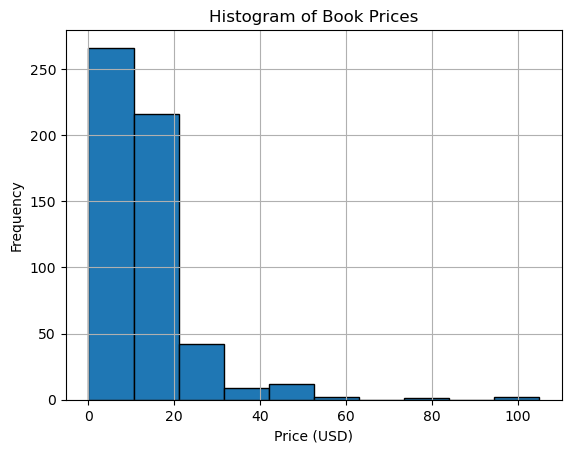

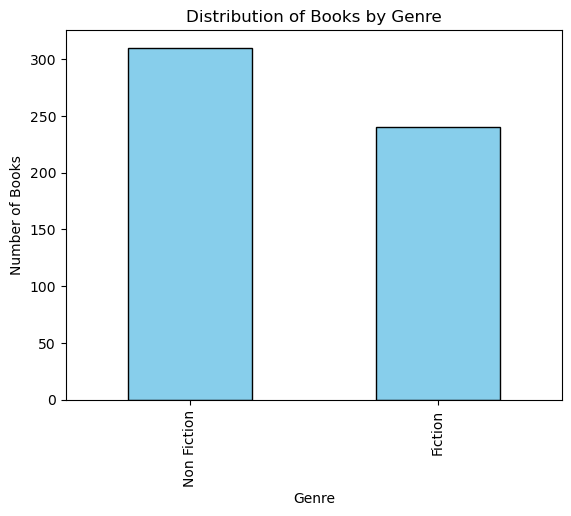

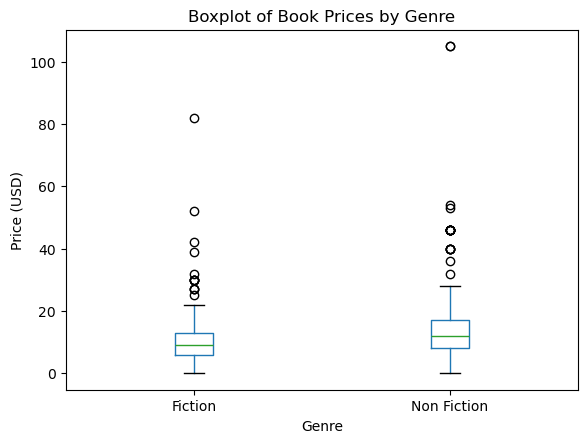

In [13]:
import matplotlib.pyplot as plt

# Histograms for numerical variables
data['User Rating'].hist(bins=20, edgecolor='black')
plt.title('Histogram of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()

data['Price'].hist(bins=10, edgecolor='black')
plt.title('Histogram of Book Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

# Bar chart for Genre distribution
genre_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Books by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Books')
plt.show()

# Box plot for Price by Genre
data.boxplot(column='Price', by='Genre', grid=False)
plt.title('Boxplot of Book Prices by Genre')
plt.suptitle('')  # Remove the automatic title
plt.xlabel('Genre')
plt.ylabel('Price (USD)')
plt.show()


In [15]:
# Correlation Analysis
correlation_matrix = data[['User Rating', 'Reviews', 'Price']].corr()

correlation_matrix


,User Rating,Reviews,Price
User Rating,1.000000,-0.001729,-0.133086
Reviews,-0.001729,1.000000,-0.109182
Price,-0.133086,-0.109182,1.000000


In [16]:
from scipy.stats import ttest_ind, chi2_contingency

# Hypothesis Testing: Difference in User Ratings between Fiction and Non-Fiction
fiction_ratings = data[data['Genre'] == 'Fiction']['User Rating']
non_fiction_ratings = data[data['Genre'] == 'Non Fiction']['User Rating']
t_stat, p_value = ttest_ind(fiction_ratings, non_fiction_ratings)

# Prepare data for Chi-square test: Genre vs. Year
genre_year_table = pd.crosstab(data['Year'], data['Genre'])
chi2_stat, chi2_p, dof, expected = chi2_contingency(genre_year_table)

# Results of hypothesis testing
hypothesis_results = {
    "T-Test (Fiction vs Non-Fiction Ratings)": {"t-statistic": t_stat, "p-value": p_value},
    "Chi-Square Test (Genre vs Year)": {"chi2-statistic": chi2_stat, "p-value": chi2_p}
}

hypothesis_results


{'T-Test (Fiction vs Non-Fiction Ratings)': {'t-statistic': 2.7406936696488353,
  'p-value': 0.0063309975552837015},
 'Chi-Square Test (Genre vs Year)': {'chi2-statistic': 8.59005376344086,
  'p-value': 0.5713994983967328}}

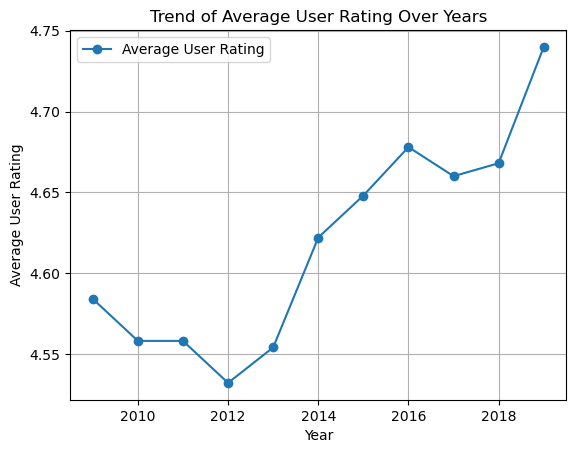

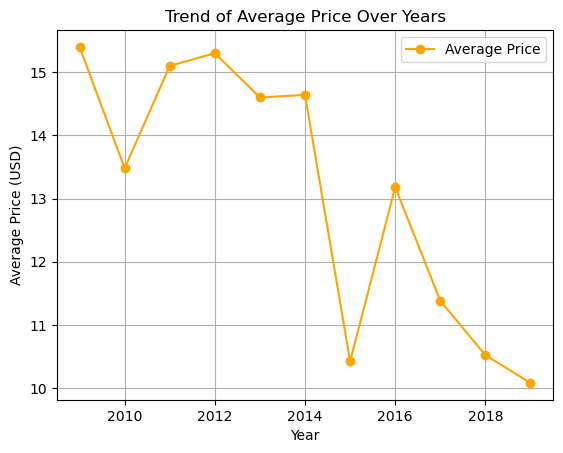

In [17]:
# Trend Analysis: Average User Rating and Price Over Years
trend_data = data.groupby('Year').agg({'User Rating': 'mean', 'Price': 'mean'}).reset_index()

# Plot trends
plt.plot(trend_data['Year'], trend_data['User Rating'], marker='o', label='Average User Rating')
plt.title('Trend of Average User Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Average User Rating')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(trend_data['Year'], trend_data['Price'], marker='o', label='Average Price', color='orange')
plt.title('Trend of Average Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.grid(True)
plt.legend()
plt.show()


In [18]:
from collections import Counter
import re

# Combine all book titles into a single string
all_titles = ' '.join(data['Name'])

# Preprocess titles: remove special characters and split into words
words = re.findall(r'\b\w+\b', all_titles.lower())

# Count the frequency of each word
word_freq = Counter(words)

# Create a DataFrame for the word frequencies
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Display the most common words
tools.display_dataframe_to_user(name="Word Frequency in Book Titles", dataframe=word_freq_df.head(20))

word_freq_df.head(20)


NameError: name 'tools' is not defined